In [1]:
import pandas as pd
import numpy as np

# Dataset Description

• Sex: male or female(Nominal)<br>
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)<br>
Behavioral<br>
• Current Smoker: whether or not the patient is a current smoker (Nominal)<br>
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br>
Medical( history)<br>
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)<br>
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)<br>
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)<br>
• Diabetes: whether or not the patient had diabetes (Nominal)<br>
Medical(current)<br>
• Tot Chol: total cholesterol level (Continuous)<br>
• Sys BP: systolic blood pressure (Continuous)<br>
• Dia BP: diastolic blood pressure (Continuous)<br>
• BMI: Body Mass Index (Continuous)<br>
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>
• Glucose: glucose level (Continuous)<br>
Predict variable (desired target)<br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
Education <br>
1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college<br>

In [2]:
data=pd.read_csv(r'C:\Users\hp\Dibeties prediction\dibeties.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
data.shape

(4240, 16)

In [6]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
data.TenYearCHD.unique()

array([0, 1], dtype=int64)

In [9]:
data.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [10]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
null = data[data.isna().any(axis=1)]
null

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [12]:
data.shape

(4240, 16)

In [13]:
#we have remove the row having Nan value in education
data = data.dropna(axis=0, subset=['education'])

In [14]:
data.shape

(4135, 16)

In [15]:
# check for dupicate values in dataset
duplicate_data = data[data.duplicated()]
duplicate_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [16]:
# Check for Missing values after deletion of education
data.isna().sum()
null = data[data.isna().any(axis=1)]
null

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
49,1,36,3.0,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [17]:
data.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          27
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            380
TenYearCHD           0
dtype: int64

## From the results it is clear that 
cigsPerDay has 27 null values,<br>
BPMeds has 53 null values,<br>
totChol has 49 null values,<br>
BMI has 18 null values,<br>
glucose has 380 null values<br>
heartRate has 1 null value.<br>

In [18]:
print("Mean of each variable:\n ",data.mean())
print("\n Median of each variable:\n ",data.median())
print("\n Mode of each variable:\n ",data.mode())

Mean of each variable:
  male                 0.427328
age                 49.552358
education            1.979444
currentSmoker        0.494800
cigsPerDay           9.032863
BPMeds               0.029642
prevalentStroke      0.006046
prevalentHyp         0.311245
diabetes             0.025635
totChol            236.637788
sysBP              132.369287
diaBP               82.876663
BMI                 25.777345
heartRate           75.922835
glucose             81.937949
TenYearCHD           0.151874
dtype: float64

 Median of each variable:
  male                 0.00
age                 49.00
education            2.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            234.00
sysBP              128.00
diaBP               82.00
BMI                 25.38
heartRate           75.00
glucose             78.00
TenYearCHD           0.00
dtype: float64

 Mode of each varia

In [19]:
#replacing the Nan Value

data['BPMeds'].fillna(data.BPMeds.median(), inplace=True)
data['cigsPerDay'].fillna(data.cigsPerDay.median(), inplace=True)
data['totChol'].fillna(data.totChol.mean(), inplace=True)
data['heartRate'].fillna(data.heartRate.median(), inplace=True)
data['BMI'].fillna(data.BMI.mean(), inplace=True)
data['glucose'].fillna(data.glucose.mean(), inplace=True)

In [20]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
null = data[data.isna().any(axis=1)]
null

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [22]:
data.shape

(4135, 16)

In [23]:
data = pd.get_dummies(data,columns=['education']) 


In [24]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0


In [25]:
## Checking the newly added columns of the dataset after performing dummy encoding
for col in data.columns: 
    print(col)

male
age
currentSmoker
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
TenYearCHD
education_1.0
education_2.0
education_3.0
education_4.0


In [26]:
data.shape

(4135, 19)

In [27]:
duplicate_data = data[data.duplicated()]
duplicate_data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0


In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, 'Correlation between different fearures')

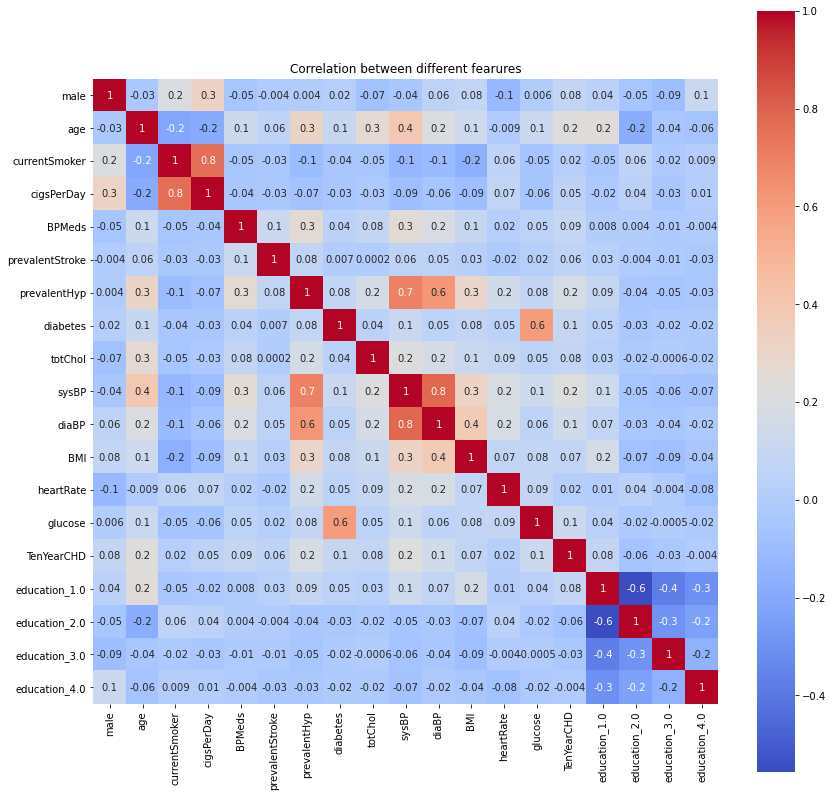

In [29]:
#heat map
correlation = data.corr()
plt.figure(figsize=(14,14))
g = sns.heatmap(correlation, vmax=1, square=True,cmap='coolwarm',annot= True,xticklabels=True,yticklabels=True, fmt='.1g')
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Correlation between different fearures')

# MODEL

In [30]:
## Defining the Independant and Dependant variable

y = data['TenYearCHD']
x = data.drop(['TenYearCHD'], axis = 1)

In [31]:
# pip install imbalanced-learn

In [32]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=27)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(3101, 18) (3101,)
(1034, 18) (1034,)


In [35]:
## Upsampling the Training set

sm = SMOTE(random_state=23, sampling_strategy='minority')
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
print(len(x_train_sm), len(y_train_sm))

5238 5238


In [36]:
print(x_train_sm.shape)
print(y_train_sm.shape)

(5238, 18)
(5238,)


In [38]:
# print(Counter(y_train_sm))
y_train_sm.value_counts()

1    2619
0    2619
Name: TenYearCHD, dtype: int64

In [39]:
## Upsampling the Testing set
sm_test = SMOTE(random_state=23, sampling_strategy='minority')
x_test_sm, y_test_sm = sm_test.fit_resample(x_test, y_test)
print(len(x_test_sm), len(y_test_sm))

1776 1776


In [40]:
## Printing the shapes of testing set after Upsampling
print(x_test_sm.shape)
print(y_test_sm.shape)

(1776, 18)
(1776,)


In [41]:
y_test_sm.value_counts()

1    888
0    888
Name: TenYearCHD, dtype: int64

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [47]:
from time import time

In [48]:
# Create the sub-model
HRFLM_estimators = []

# Defining 1 Logistic Regression Model
model11 = LogisticRegression(random_state = 0,C=1, max_iter=10000)
HRFLM_estimators.append(('logistic1', model11))


# Defining 3 Random Forest Models
model21 = RandomForestClassifier(random_state = 0)
HRFLM_estimators.append(('RF1', model21))

model22 = RandomForestClassifier(random_state = 0) 
HRFLM_estimators.append(('RF2', model22))

model23 = RandomForestClassifier(random_state = 0)
HRFLM_estimators.append(('RF3', model23))


# Defining the HRFLM ensemble model
HRFLM_ensemble = VotingClassifier(HRFLM_estimators,voting='soft')
results = {}
#Training the model 
start = time()
HRFLM_ensemble.fit(x_train_sm, y_train_sm)
end = time()
results['training_time'] = end - start

#Testing the model 
start = time()
HRFLM_Prediction = HRFLM_ensemble.predict(x_test_sm)
end = time()
results['testing_time'] = end - start

print("MODELLING TIMES(ms) OF HRFLM ARE:")
print("********************************************")
print("Training time: "+"{:.2f}".format(results['training_time']))
print("Testing time: "+"{:.2f}".format(results['testing_time']))
print("********************************************\n")


## Accuracy Score
HRFLM_Accuracy = accuracy_score(y_test_sm, HRFLM_Prediction)
print("The accuracy score for HRFLM in percentage is: "+"{:.2f}".format(HRFLM_Accuracy*100))

## Precision
HRFLM_Precision = precision_score(y_test_sm, HRFLM_Prediction)
print("The precision score for HRFLM is: "+"{:.2f}".format(HRFLM_Precision))

## Recall 
HRFLM_Recall = recall_score(y_test_sm, HRFLM_Prediction)
print("The recall score for HRFLM is as follows: "+"{:.2f}".format(HRFLM_Recall))

## F1 Score
HRFLM_F1Score = f1_score(y_test_sm, HRFLM_Prediction)
print("The F1 Score for HRFLM is: "+"{:.2f}".format(HRFLM_F1Score))

## Confusion Matrix 
HRFLM_Confusion_Matrix=confusion_matrix(y_test_sm,HRFLM_Prediction)
print("Confusion_Matrix: \n\n",HRFLM_Confusion_Matrix, "\n" )

## Classification Report
target_names =['class 0', 'class 1']
print(classification_report(y_test_sm,HRFLM_Prediction,zero_division=1,target_names=target_names))


## Cross Validation
start = time()
HRFLM_accuracies = cross_val_score(HRFLM_ensemble, X = x_train_sm, y = y_train_sm, cv = 10)
print("Cross Validation Accuracy: {:.2f} ".format(HRFLM_accuracies.mean()))
print("Cross Validation Standard Deviation: {:.2f} %".format(HRFLM_accuracies.std()*100))
end = time()
results['Cross_Validation time'] = end - start
print("Cross_Validation time: "+"{:.2f}".format(results['Cross_Validation time']))

MODELLING TIMES(ms) OF HRFLM ARE:
********************************************
Training time: 6.89
Testing time: 0.29
********************************************

The accuracy score for HRFLM in percentage is: 81.31
The precision score for HRFLM is: 0.93
The recall score for HRFLM is as follows: 0.68
The F1 Score for HRFLM is: 0.78
Confusion_Matrix: 

 [[839  49]
 [283 605]] 

              precision    recall  f1-score   support

     class 0       0.75      0.94      0.83       888
     class 1       0.93      0.68      0.78       888

    accuracy                           0.81      1776
   macro avg       0.84      0.81      0.81      1776
weighted avg       0.84      0.81      0.81      1776

Cross Validation Accuracy: 0.89 
Cross Validation Standard Deviation: 9.44 %
Cross_Validation time: 81.00


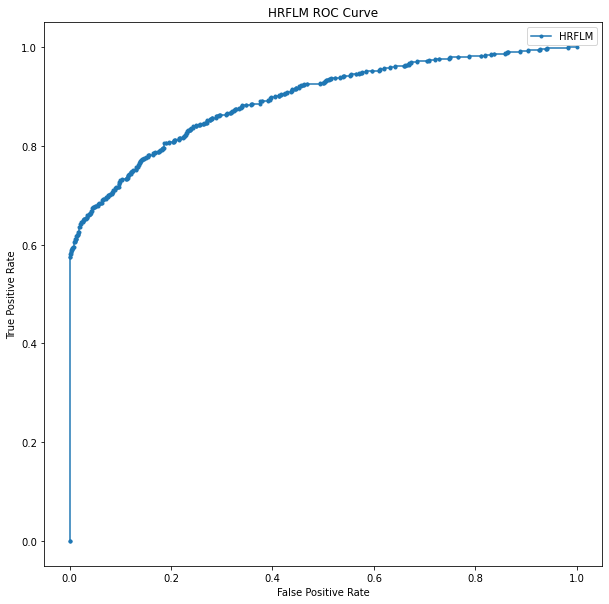

In [53]:
HRFLM_pred_proba = HRFLM_ensemble.predict_proba(x_test_sm)[:,1]
fpr_HRFLM, tpr_HRFLM, thresholds_HRFLM = roc_curve(y_test_sm, HRFLM_pred_proba)

plt.figure(figsize=(10,10))
plt.plot(fpr_HRFLM, tpr_HRFLM, marker='.', label='HRFLM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('HRFLM ROC Curve')
# show the legend
plt.legend()
# show the plot
plt.savefig('plot.png')
plt.show()


In [51]:
## Calculating AUC score of HRFLM from the roc curve
HRFLM_AUC_Score = roc_auc_score(y_test_sm, HRFLM_pred_proba)
HRFLM_AUC_Score

0.8935506452398343